### K-means clustering

An unsupervised learning algorithm which means you take unlabelled data and put them in clusters (based on their characteristics) as name suggests. 
Data or objects similar in characteristics or nature are put together in groups or clusters. 

K denotes the number of clusters to be formed. For example k=2 means there will be 2 clusters.

How it works:
- Initially two centroids are assigned randomly.
- The Euclidean Distance is used to find out which centroid is closest to each data point and data points are assigned to coresponding centroids.
- The process is iteratively repeated until our centroid is actual central point of cluster and becomes static

Euclidean distance can be calculated using:

\(d=\sqrt{(x_{2}-x_{1})^{2}+(y_{2}-y_{1})^{2}}\).

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# makeblobs creates fake data for clustering
from sklearn.datasets import make_blobs

#cluster_std controls how spread out the clusters are
# Smaller value:tighter clusters, Larger value: more overlap

X, y_true = make_blobs(n_samples=500, centers=4,cluster_std=0.60, random_state=0)

print(X.shape)  #500 rows/data points and 2 columns/coordinates x and y 
print(y_true.shape)

(500, 2)
(500,)


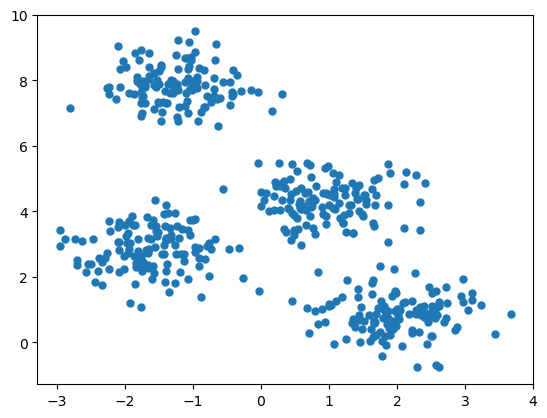

In [12]:
plt.scatter(X[:, 0], X[:, 1], s=25)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
#tells which cluster a point belongs to
#there are 4 clusters 0,1,2,3
y_kmeans

array([3, 3, 1, 1, 3, 0, 0, 1, 1, 2, 0, 3, 0, 2, 1, 1, 3, 1, 2, 1, 1, 3,
       0, 2, 1, 2, 3, 0, 2, 0, 0, 0, 3, 0, 0, 3, 2, 1, 2, 3, 2, 1, 1, 3,
       0, 3, 1, 1, 3, 3, 2, 2, 0, 1, 1, 0, 0, 2, 2, 3, 3, 2, 3, 3, 3, 0,
       1, 3, 1, 0, 2, 1, 2, 3, 2, 3, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2,
       3, 2, 2, 2, 3, 2, 1, 1, 3, 3, 3, 1, 2, 2, 3, 2, 1, 1, 0, 3, 1, 2,
       2, 0, 2, 2, 3, 2, 3, 1, 0, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 2, 1, 2,
       0, 2, 2, 2, 1, 3, 1, 0, 3, 3, 3, 3, 0, 2, 1, 1, 0, 2, 2, 3, 1, 1,
       1, 0, 0, 3, 0, 1, 3, 1, 3, 3, 0, 0, 3, 1, 2, 0, 3, 2, 3, 0, 1, 2,
       1, 2, 2, 2, 3, 3, 3, 1, 0, 2, 0, 3, 0, 2, 3, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 3, 3, 1, 3, 0, 2, 2, 2,
       1, 3, 0, 2, 0, 3, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 3, 3, 0,
       0, 3, 2, 2, 1, 3, 1, 1, 1, 0, 3, 2, 1, 2, 2, 0, 2, 0, 1, 1, 3, 2,
       3, 3, 1, 1, 2, 3, 1, 2, 3, 0, 3, 2, 0, 0, 1, 3, 3, 1, 3, 0, 3, 0,
       0, 3, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 3, 3,

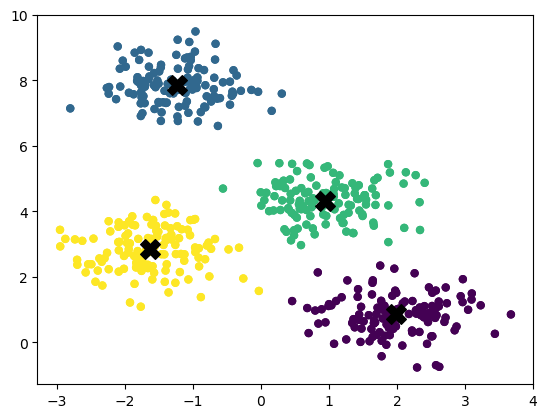

In [20]:
#Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=25, cmap='viridis')
#plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],c='black', s=200, marker='X')
plt.show()